<a href="https://colab.research.google.com/github/GiovaniMicheloni/mlearning-w-python/blob/main/normalidade_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Teste de normalidade nos resultados dos modelos para a base de credito



In [ ]:
!pip -q install plotly

In [ ]:
!pip -q  install yellowbrick

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
basecredito = pd.read_csv('/content/credit_data.csv')

In [ ]:
basecredito.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [ ]:
basecredito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       1997 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.3 KB


In [ ]:
basecredito[basecredito['age']<0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [ ]:
basecredito[basecredito['age']>0].mean()

,0
clientid,1003.431795
income,45328.856915
age,40.927700
loan,4443.240892
default,0.141926


In [ ]:
basecredito.loc[basecredito['age']<0, 'age'] = 40.92

In [ ]:
basecredito[basecredito['age']<0]

,clientid,income,age,loan,default


In [ ]:
basecredito.isnull().sum()

,0
clientid,0
income,0
age,3
loan,0
default,0


In [ ]:
basecredito.loc[pd.isnull(basecredito['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [ ]:
basecredito['age']= basecredito['age'].fillna(basecredito['age'].mean())

In [ ]:
xcredito = basecredito.iloc[:,1:4].values
xcredito

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [ ]:
ycredito = basecredito.iloc[:,4].values
ycredito

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()
xcredito = standardscaler.fit_transform(xcredito)
xcredito

array([[ 1.45393393,  1.36538093,  1.20281942],
       [-0.76217555,  0.5426602 ,  0.69642695],
       [ 0.83682073,  1.67417189,  1.17471147],
       ...,
       [-0.07122592, -0.97448519,  0.35420081],
       [-0.11000289,  1.73936739, -0.92675625],
       [ 1.682986  ,  1.14917639,  0.96381038]])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural = []

for i in range(30):
  print(i)
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
  scores = cross_val_score(arvore, xcredito, ycredito, cv = kfold)
  #print(scores)
  #print(scores.mean())
  resultados_arvore.append(scores.mean())

  random_forest = RandomForestClassifier(criterion = 'entropy', min_samples_leaf = 1, min_samples_split=5, n_estimators = 10)
  scores = cross_val_score(random_forest, xcredito, ycredito, cv = kfold)
  resultados_random_forest.append(scores.mean())

  knn = KNeighborsClassifier()
  scores = cross_val_score(knn, xcredito, ycredito, cv = kfold)
  resultados_knn.append(scores.mean())

  svm = SVC(kernel = 'rbf', C = 2.0)
  scores = cross_val_score(svm, xcredito, ycredito, cv = kfold)
  resultados_svm.append(scores.mean())

  rede_neural = MLPClassifier(activation = 'relu', batch_size = 56, solver = 'adam')
  scores = cross_val_score(rede_neural, xcredito, ycredito, cv = kfold)
  resultados_rede_neural.append(scores.mean())

In [ ]:
resultados_arvore

[np.float64(0.984),
 np.float64(0.9894999999999999),
 np.float64(0.9875),
 np.float64(0.9855),
 np.float64(0.991),
 np.float64(0.9870000000000001),
 np.float64(0.9890000000000001),
 np.float64(0.9889999999999999),
 np.float64(0.9879999999999999),
 np.float64(0.986),
 np.float64(0.9889999999999999),
 np.float64(0.9865),
 np.float64(0.9879999999999999),
 np.float64(0.9879999999999999),
 np.float64(0.9879999999999999),
 np.float64(0.9899999999999999),
 np.float64(0.9894999999999999),
 np.float64(0.9855),
 np.float64(0.986),
 np.float64(0.9889999999999999),
 np.float64(0.9854999999999998),
 np.float64(0.9884999999999999),
 np.float64(0.9869999999999999),
 np.float64(0.9884999999999999),
 np.float64(0.9869999999999999),
 np.float64(0.9884999999999998),
 np.float64(0.9880000000000001),
 np.float64(0.99),
 np.float64(0.9884999999999999),
 np.float64(0.9890000000000001)]

In [ ]:
resultados_random_forest

[np.float64(0.984),
 np.float64(0.986),
 np.float64(0.9854999999999998),
 np.float64(0.9839999999999998),
 np.float64(0.9835),
 np.float64(0.9884999999999999),
 np.float64(0.986),
 np.float64(0.9844999999999999),
 np.float64(0.9875),
 np.float64(0.985),
 np.float64(0.982),
 np.float64(0.9879999999999999),
 np.float64(0.985),
 np.float64(0.985),
 np.float64(0.978),
 np.float64(0.986),
 np.float64(0.9845),
 np.float64(0.9834999999999999),
 np.float64(0.9800000000000001),
 np.float64(0.9795),
 np.float64(0.984),
 np.float64(0.9814999999999999),
 np.float64(0.9834999999999999),
 np.float64(0.9865),
 np.float64(0.9815000000000002),
 np.float64(0.9834999999999999),
 np.float64(0.982),
 np.float64(0.982),
 np.float64(0.9804999999999999),
 np.float64(0.9814999999999999)]

In [ ]:
resultados_knn

[np.float64(0.977),
 np.float64(0.983),
 np.float64(0.9814999999999999),
 np.float64(0.9784999999999998),
 np.float64(0.9819999999999999),
 np.float64(0.9809999999999999),
 np.float64(0.978),
 np.float64(0.9804999999999998),
 np.float64(0.9795),
 np.float64(0.9799999999999999),
 np.float64(0.9824999999999999),
 np.float64(0.9810000000000001),
 np.float64(0.9839999999999998),
 np.float64(0.9809999999999999),
 np.float64(0.984),
 np.float64(0.9819999999999999),
 np.float64(0.9839999999999998),
 np.float64(0.982),
 np.float64(0.9804999999999999),
 np.float64(0.9774999999999998),
 np.float64(0.982),
 np.float64(0.9814999999999999),
 np.float64(0.9789999999999999),
 np.float64(0.9804999999999999),
 np.float64(0.9795),
 np.float64(0.9819999999999999),
 np.float64(0.9810000000000001),
 np.float64(0.9804999999999999),
 np.float64(0.9810000000000001),
 np.float64(0.9800000000000001)]

In [ ]:
resultados_svm

[np.float64(0.9849999999999998),
 np.float64(0.9860000000000001),
 np.float64(0.9854999999999998),
 np.float64(0.9855),
 np.float64(0.9844999999999999),
 np.float64(0.9834999999999999),
 np.float64(0.984),
 np.float64(0.9865),
 np.float64(0.9869999999999999),
 np.float64(0.9844999999999999),
 np.float64(0.985),
 np.float64(0.985),
 np.float64(0.9865),
 np.float64(0.9884999999999999),
 np.float64(0.9869999999999999),
 np.float64(0.9854999999999998),
 np.float64(0.9849999999999998),
 np.float64(0.9869999999999999),
 np.float64(0.985),
 np.float64(0.982),
 np.float64(0.9835),
 np.float64(0.985),
 np.float64(0.9860000000000001),
 np.float64(0.985),
 np.float64(0.986),
 np.float64(0.9844999999999999),
 np.float64(0.984),
 np.float64(0.9864999999999998),
 np.float64(0.985),
 np.float64(0.984)]

In [ ]:
resultados_rede_neural

[np.float64(0.9964999999999999),
 np.float64(0.9974999999999999),
 np.float64(0.9970000000000001),
 np.float64(0.9970000000000001),
 np.float64(0.9964999999999999),
 np.float64(0.9964999999999999),
 np.float64(0.9970000000000001),
 np.float64(0.9969999999999999),
 np.float64(0.9969999999999999),
 np.float64(0.9964999999999998),
 np.float64(0.9969999999999999),
 np.float64(0.9970000000000001),
 np.float64(0.9964999999999999),
 np.float64(0.9964999999999999),
 np.float64(0.9974999999999999),
 np.float64(0.9974999999999999),
 np.float64(0.9964999999999999),
 np.float64(0.9974999999999999),
 np.float64(0.9969999999999999),
 np.float64(0.9970000000000001),
 np.float64(0.9969999999999999),
 np.float64(0.9959999999999999),
 np.float64(0.9969999999999999),
 np.float64(0.9959999999999999),
 np.float64(0.9964999999999999),
 np.float64(0.9969999999999999),
 np.float64(0.9970000000000001),
 np.float64(0.9964999999999999),
 np.float64(0.9964999999999999),
 np.float64(0.9969999999999999)]

In [30]:
resultados = pd.DataFrame({'Arvore': resultados_arvore, 'Random forest': resultados_random_forest,
                           'KNN': resultados_knn, 'SVM': resultados_svm, 'Rede neural': resultados_rede_neural})
resultados

,Arvore,Random forest,KNN,SVM,Rede neural
0,0.9840,0.9840,0.9770,0.9850,0.9965
1,0.9895,0.9860,0.9830,0.9860,0.9975
2,0.9875,0.9855,0.9815,0.9855,0.9970
3,0.9855,0.9840,0.9785,0.9855,0.9970
4,0.9910,0.9835,0.9820,0.9845,0.9965
5,0.9870,0.9885,0.9810,0.9835,0.9965
6,0.9890,0.9860,0.9780,0.9840,0.9970
7,0.9890,0.9845,0.9805,0.9865,0.9970
8,0.9880,0.9875,0.9795,0.9870,0.9970
9,0.9860,0.9850,0.9800,0.9845,0.9965


In [31]:
#media e desvio padrao
resultados.describe()

,Arvore,Random forest,KNN,SVM,Rede neural
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987883,0.983750,0.980883,0.985267,0.996833
std,0.001612,0.002538,0.001794,0.001311,0.000401
min,0.984000,0.978000,0.977000,0.982000,0.996000
25%,0.987000,0.982000,0.980000,0.984500,0.996500
50%,0.988000,0.984000,0.981000,0.985000,0.997000
75%,0.989000,0.985375,0.982000,0.986000,0.997000
max,0.991000,0.988500,0.984000,0.988500,0.997500


In [32]:
#variancia
resultados.var()

,0
Arvore,2.597989e-06
Random forest,6.443966e-06
KNN,3.218678e-06
SVM,1.719540e-06
Rede neural,1.609195e-07


In [33]:
#coeficiente de variaçao
(resultados.std() / resultados.mean()) * 100 #(desvio padrao / média)*100

,0
Arvore,0.163160
Random forest,0.258043
KNN,0.182903
SVM,0.133092
Rede neural,0.040242


In [34]:
alpha = 0.05

In [35]:
from scipy.stats import shapiro

In [36]:
shapiro(resultados_arvore), shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_svm), shapiro(resultados_rede_neural)

(ShapiroResult(statistic=np.float64(0.9655272117083592), pvalue=np.float64(0.42504617124243704)),
 ShapiroResult(statistic=np.float64(0.9827123828808559), pvalue=np.float64(0.8921593512322707)),
 ShapiroResult(statistic=np.float64(0.9676048932495831), pvalue=np.float64(0.47589242702566426)),
 ShapiroResult(statistic=np.float64(0.9724645960319859), pvalue=np.float64(0.6085761478735654)),
 ShapiroResult(statistic=np.float64(0.8656771683341161), pvalue=np.float64(0.0013443760556128834)))

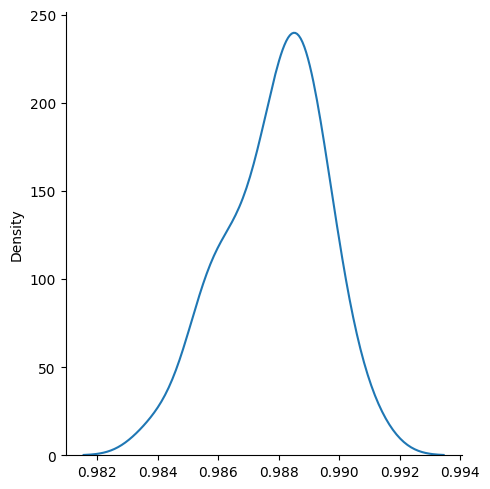

In [37]:
sns.displot(resultados_arvore, kind = 'kde');

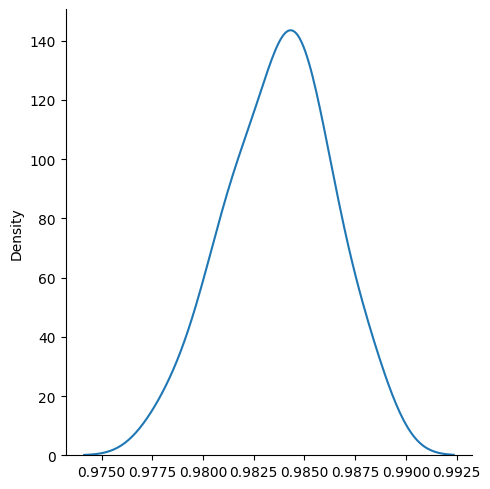

In [38]:
sns.displot(resultados_random_forest, kind = 'kde');

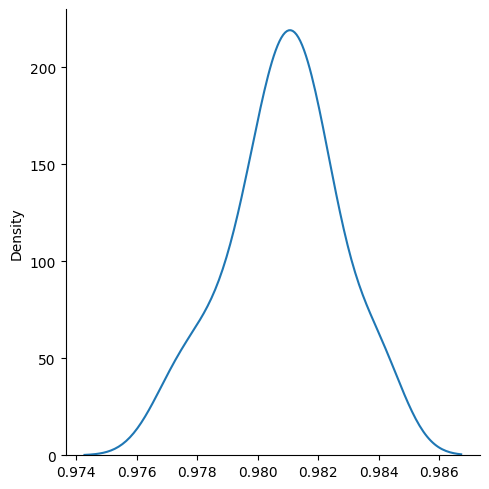

In [39]:
sns.displot(resultados_knn, kind = 'kde');

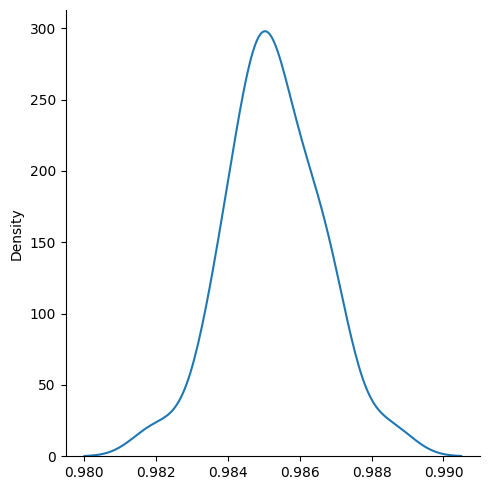

In [42]:
sns.displot(resultados_svm, kind = 'kde');

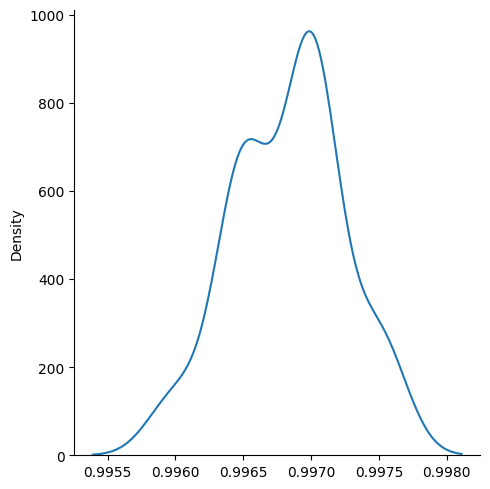

In [43]:
sns.displot(resultados_rede_neural, kind = 'kde');